In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('project3_dataset.csv')

# Display my DataFrame
df.head()



,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,2 to 5,5,3,2,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,More than 5,4,3,2,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,2 to 5,2,2,1,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,More than 5,3,2,1,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,2 to 5,4,5,4,5,5,3,3,3,4,4,1


In [2]:
# Check for missing values in each column
missing_values = df.isnull().any()

# Print columns with missing values
print(missing_values[missing_values == True])

Series([], dtype: bool)


In [3]:
# Rename columns
df = df.rename(columns={'Age ': 'Age', 'Occupation ': 'Occupation'})

# Now you can check the column names to verify the change
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness'],
      dtype='object')


In [4]:
#List all my columns 
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness'],
      dtype='object')


In [5]:
# Create a list of all unique social media platforms
all_platforms = set()
for platforms in df['SocialMediaPlatforms'].str.split(', '):
    all_platforms.update(platforms)

# Create new binary columns for each platform
for platform in all_platforms:
    df[platform] = df['SocialMediaPlatforms'].str.contains(platform).astype(int)

In [6]:
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'Facebook', 'YouTube', 'Snapchat', 'Twitter', 'Reddit',
       'Pinterest', 'Discord', 'Instagram', 'TikTok'],
      dtype='object')


In [7]:
df.head()

,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,...,Sleeplessness,Facebook,YouTube,Snapchat,Twitter,Reddit,Pinterest,Discord,Instagram,TikTok
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,2 to 5,5,...,5,1,1,0,1,1,0,1,1,0
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,More than 5,4,...,5,1,1,0,1,1,0,1,1,0
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,2 to 5,2,...,5,1,1,0,0,0,1,0,1,0
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,More than 5,3,...,2,1,0,0,0,0,0,0,1,0
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,2 to 5,4,...,1,1,1,0,0,0,0,0,1,0


In [8]:
# Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Display the updated DataFrame Columns
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'Facebook', 'YouTube', 'Snapchat', 'Twitter', 'Reddit',
       'Pinterest', 'Discord', 'Instagram', 'TikTok'],
      dtype='object')


In [9]:
df = df.join(pd.get_dummies(df['HoursSpent']).astype(int))

In [10]:
# Rename columns
df = df.rename(columns={'Less than 2 ': 'Less than 2hrs', '2 to 5': '2 to 5 hrs', 'More than 5 ' : 'More than 5 hrs'})

In [11]:
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'Facebook', 'YouTube', 'Snapchat', 'Twitter', 'Reddit',
       'Pinterest', 'Discord', 'Instagram', 'TikTok', '2 to 5 hrs',
       'Less than 2hrs', 'More than 5 hrs'],
      dtype='object')


In [12]:
df.head()

,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,...,Snapchat,Twitter,Reddit,Pinterest,Discord,Instagram,TikTok,2 to 5 hrs,Less than 2hrs,More than 5 hrs
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,2 to 5,5,...,0,1,1,0,1,1,0,1,0,0
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,More than 5,4,...,0,1,1,0,1,1,0,0,0,1
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,2 to 5,2,...,0,0,0,1,0,1,0,1,0,0
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,More than 5,3,...,0,0,0,0,0,1,0,0,0,1
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,2 to 5,4,...,0,0,0,0,0,1,0,1,0,0


# ANALYSIS
## Group the data by Social Media platform and then show relationships for each platform

## FACEBOOK 

In [13]:
# Filter the original DataFrame for rows where the 'Facebook' column is 1 (indicating Facebook usage)
facebook_users = df[df['Facebook'] == 1]

# Select only the mental health-related columns along with 'Age' and 'Gender'
mental_health_columns = ['Age', 'Gender','Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness']

# Create a new DataFrame containing only the Facebook users and the selected columns
facebook_mental_health = facebook_users[mental_health_columns]

# Display the new DataFrame
facebook_mental_health.head()


,Age,Gender,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
0,21.0,Male,5,3,2,2,5,2,3,2,5,4,5
1,21.0,Female,4,3,2,5,4,5,1,1,5,4,5
2,21.0,Female,2,2,1,5,4,3,3,1,4,2,5
3,21.0,Female,3,2,1,5,3,5,1,2,4,3,2
4,21.0,Female,4,5,4,5,5,3,3,3,4,4,1


# Show the Age/Gender of Facebook Users

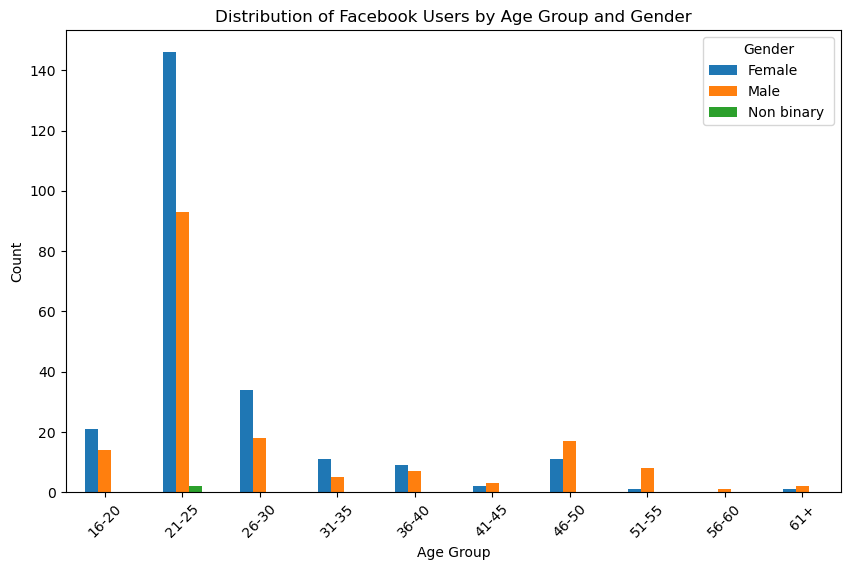

In [14]:
# Define the age categories
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, float('inf')]
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61+']

# Create a copy of the dataframe to avoid the SettingWithCopyWarning
facebook_users_copy = facebook_users.copy()

# Group the Facebook users by age and gender and count the occurrences
facebook_users_copy['AgeGroup'] = pd.cut(facebook_users_copy['Age'], bins=age_bins, labels=age_labels, right=False)
age_gender_counts = facebook_users_copy.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)

# Plot the bar chart
age_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Facebook Users by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [15]:
facebook_users.head()


,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,...,Snapchat,Twitter,Reddit,Pinterest,Discord,Instagram,TikTok,2 to 5 hrs,Less than 2hrs,More than 5 hrs
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,2 to 5,5,...,0,1,1,0,1,1,0,1,0,0
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,More than 5,4,...,0,1,1,0,1,1,0,0,0,1
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,2 to 5,2,...,0,0,0,1,0,1,0,1,0,0
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,More than 5,3,...,0,0,0,0,0,1,0,0,0,1
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,2 to 5,4,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
# Filter Facebook users by gender
female_users = facebook_users[facebook_users['Gender'] == 'Female']
male_users = facebook_users[facebook_users['Gender'] == 'Male']
non_binary_users = facebook_users[facebook_users['Gender'] == 'Non-binary']
trans_users = facebook_users[facebook_users['Gender'] == 'Trans']

print("Number of Female Users:", len(female_users))
print("Number of Male Users:", len(male_users))
print("Number of Non-binary Users:", len(non_binary_users))
print("Number of Trans Users:", len(trans_users))


# Gender vs Hours spent on Facebook

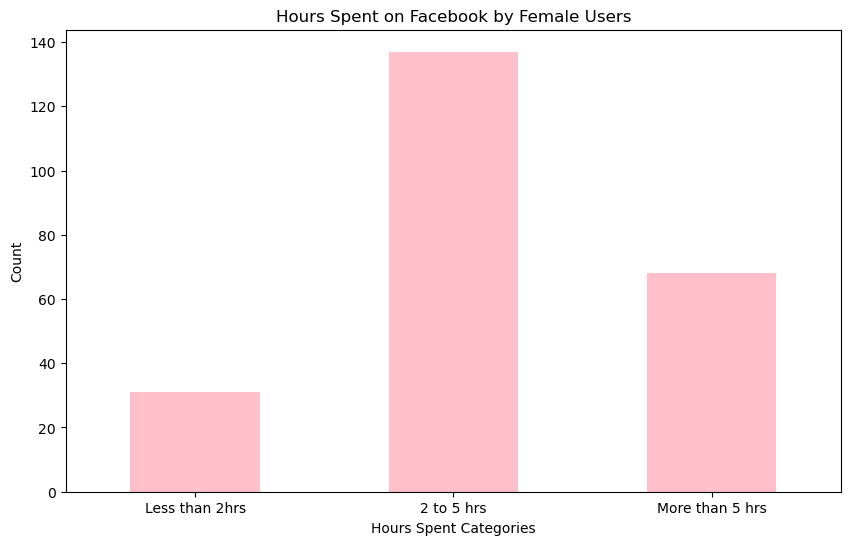

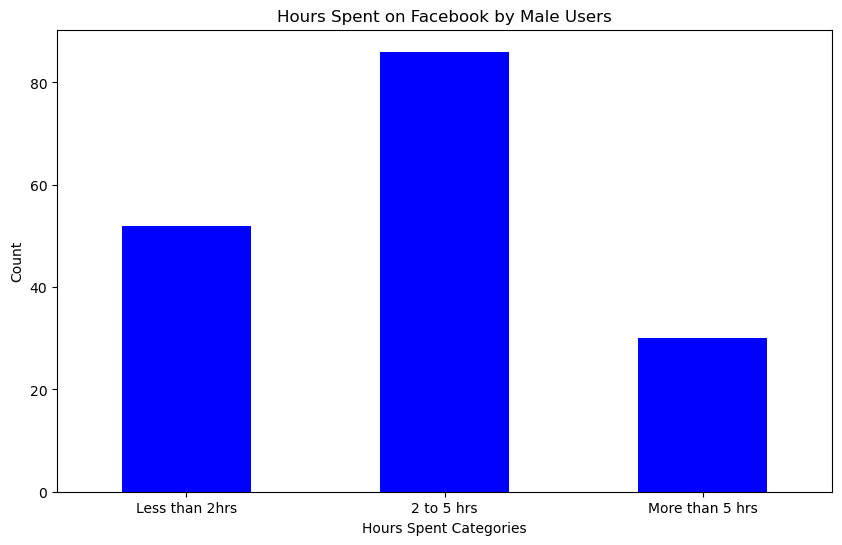

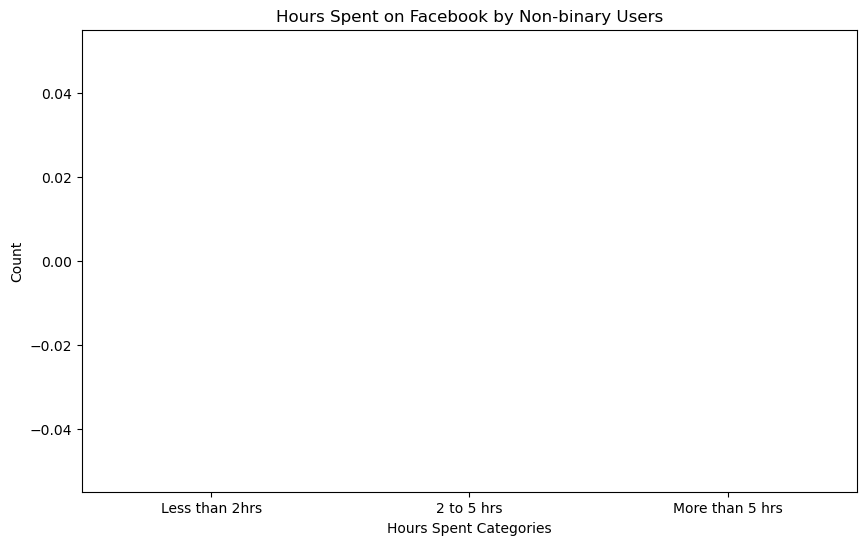

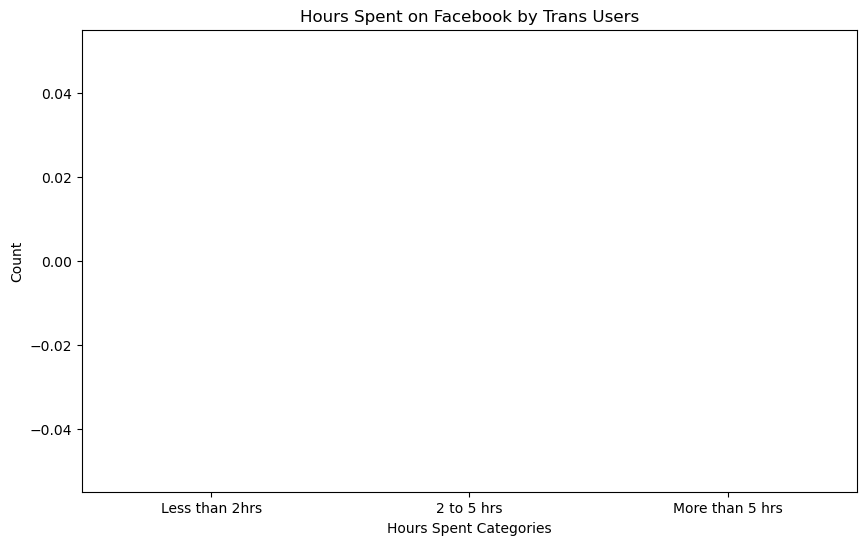

In [16]:
# Plot hours spent on Facebook vs Gender

# Filter the original DataFrame for Facebook users
facebook_users = df[df['Facebook'] == 1]

# Filter Facebook users by gender
female_users = facebook_users[facebook_users['Gender'] == 'Female']
male_users = facebook_users[facebook_users['Gender'] == 'Male']
non_binary_users = facebook_users[facebook_users['Gender'] == 'Non-binary']
trans_users = facebook_users[facebook_users['Gender'] == 'Trans']

# Plot for female users
plt.figure(figsize=(10, 6))
female_users[['Less than 2hrs', '2 to 5 hrs', 'More than 5 hrs']].sum().plot(kind='bar', color='pink')
plt.title('Hours Spent on Facebook by Female Users')
plt.xlabel('Hours Spent Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot for male users
plt.figure(figsize=(10, 6))
male_users[['Less than 2hrs', '2 to 5 hrs', 'More than 5 hrs']].sum().plot(kind='bar', color='blue')
plt.title('Hours Spent on Facebook by Male Users')
plt.xlabel('Hours Spent Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot for non-binary users
plt.figure(figsize=(10, 6))
non_binary_users[['Less than 2hrs', '2 to 5 hrs', 'More than 5 hrs']].sum().plot(kind='bar', color='purple')
plt.title('Hours Spent on Facebook by Non-binary Users')
plt.xlabel('Hours Spent Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot for trans users
plt.figure(figsize=(10, 6))
trans_users[['Less than 2hrs', '2 to 5 hrs', 'More than 5 hrs']].sum().plot(kind='bar', color='green')
plt.title('Hours Spent on Facebook by Trans Users')
plt.xlabel('Hours Spent Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Hours spent on Facebook vs Age

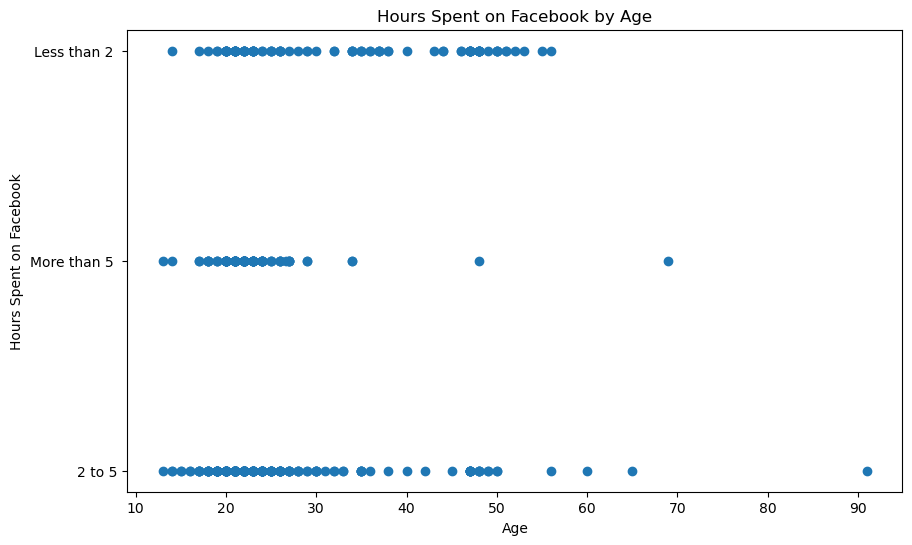

In [17]:
# Plot hours spent on Facebook vs Age
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['HoursSpent'])
plt.xlabel('Age')
plt.ylabel('Hours Spent on Facebook')
plt.title('Hours Spent on Facebook by Age')
plt.show()

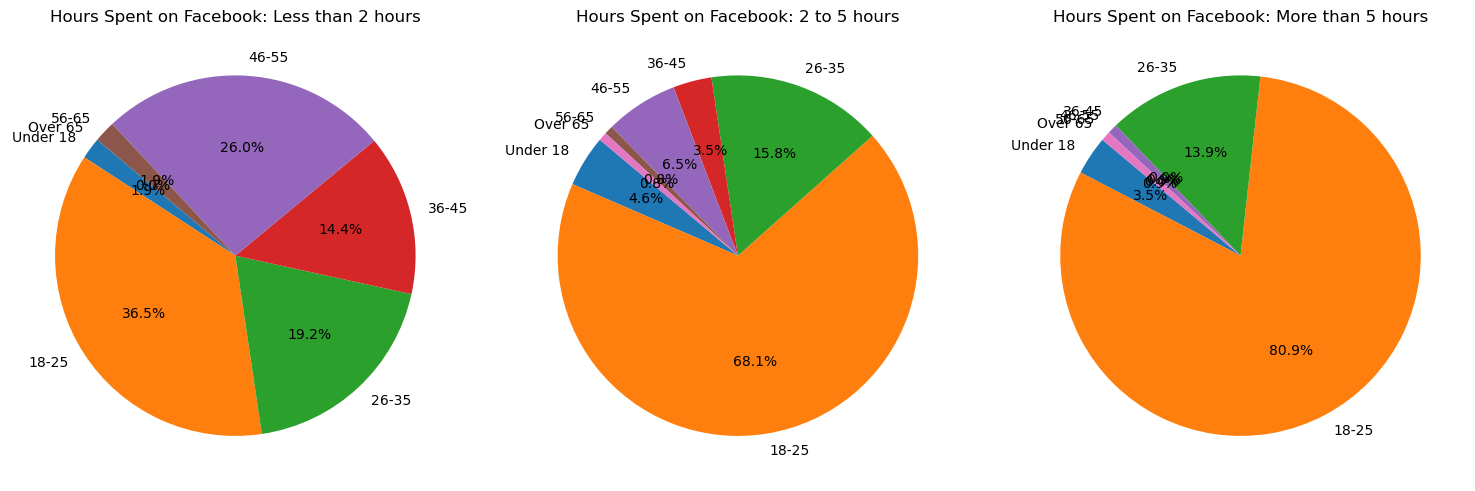

In [18]:
# Define age groups
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
labels = ['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', 'Over 65']

# Apply age groups to the DataFrame
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the sum of hours spent in each category for each age group
less_than_2_hours_age_group = df.groupby('AgeGroup')['Less than 2hrs'].sum()
between_2_and_5_hours_age_group = df.groupby('AgeGroup')['2 to 5 hrs'].sum()
more_than_5_hours_age_group = df.groupby('AgeGroup')['More than 5 hrs'].sum()

# Create pie charts for each category
plt.figure(figsize=(15, 5))

# Pie chart for less than 2 hours
plt.subplot(1, 3, 1)
plt.pie(less_than_2_hours_age_group, labels=less_than_2_hours_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Hours Spent on Facebook: Less than 2 hours')

# Pie chart for 2 to 5 hours
plt.subplot(1, 3, 2)
plt.pie(between_2_and_5_hours_age_group, labels=between_2_and_5_hours_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Hours Spent on Facebook: 2 to 5 hours')

# Pie chart for more than 5 hours
plt.subplot(1, 3, 3)
plt.pie(more_than_5_hours_age_group, labels=more_than_5_hours_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Hours Spent on Facebook: More than 5 hours')

plt.tight_layout()
plt.show()

# Mental Health Scores vs Frequency of social media sites used

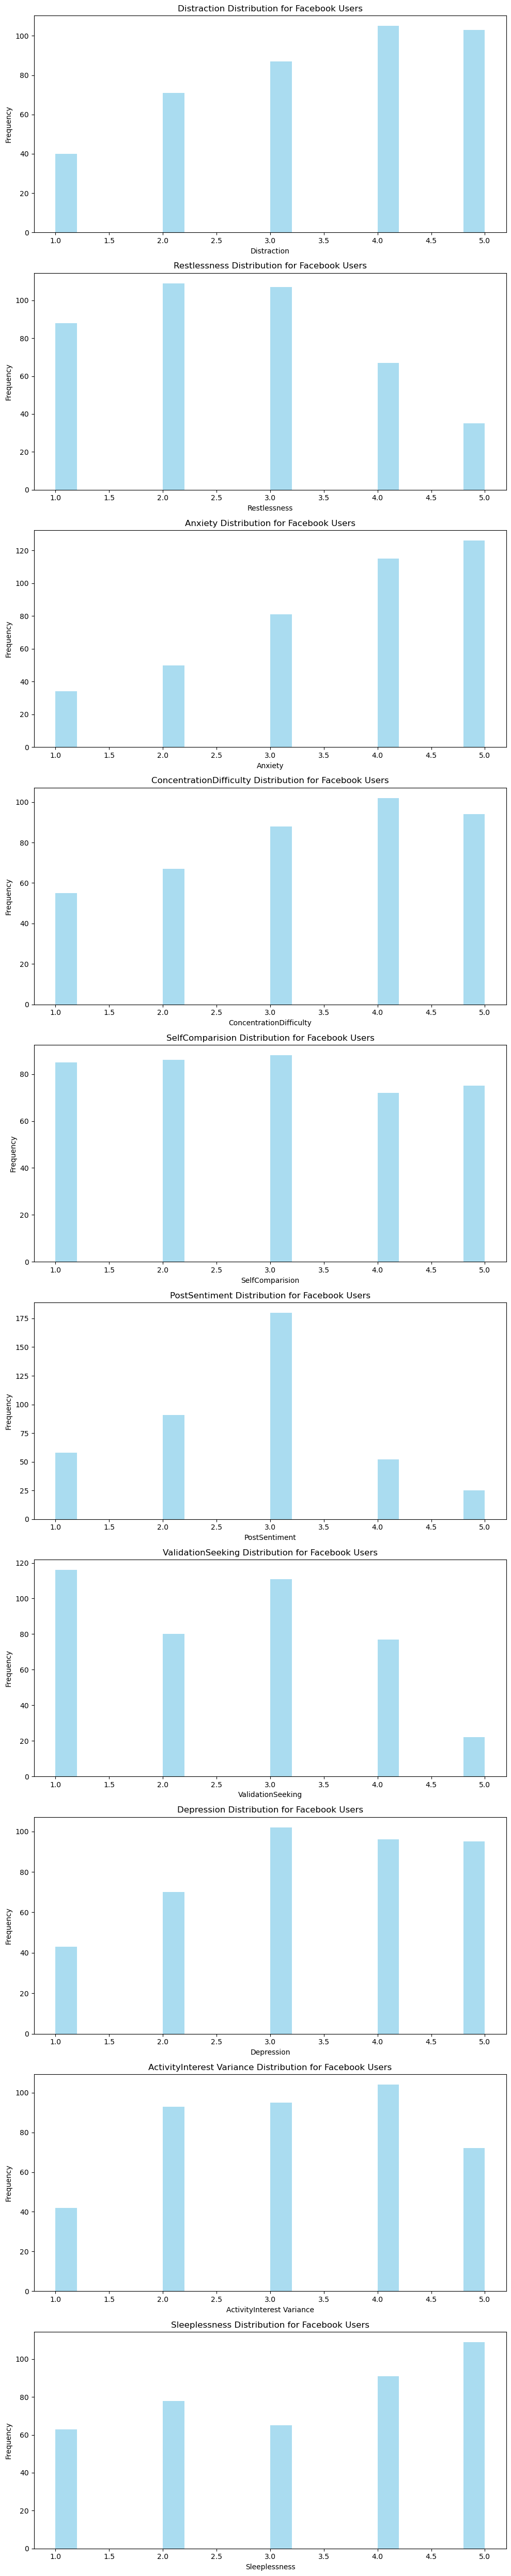

In [19]:
# Analyze Facebook vs Mental Health scores 

# Define the mental health columns
mental_health_columns = ['Distraction', 'Restlessness', 'Anxiety', 
                         'ConcentrationDifficulty', 'SelfComparision', 
                         'PostSentiment', 'ValidationSeeking', 'Depression', 
                         'ActivityInterest Variance', 'Sleeplessness']

# Create subplots for each mental health column
fig, axes = plt.subplots(len(mental_health_columns), 1, figsize=(10, 5 * len(mental_health_columns)))

# Plot each mental health column for Facebook users
for i, column in enumerate(mental_health_columns):
    ax = axes[i]
    ax.hist(facebook_users[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(f'{column} Distribution for Facebook Users')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Age & Gender vs Mental Health scores

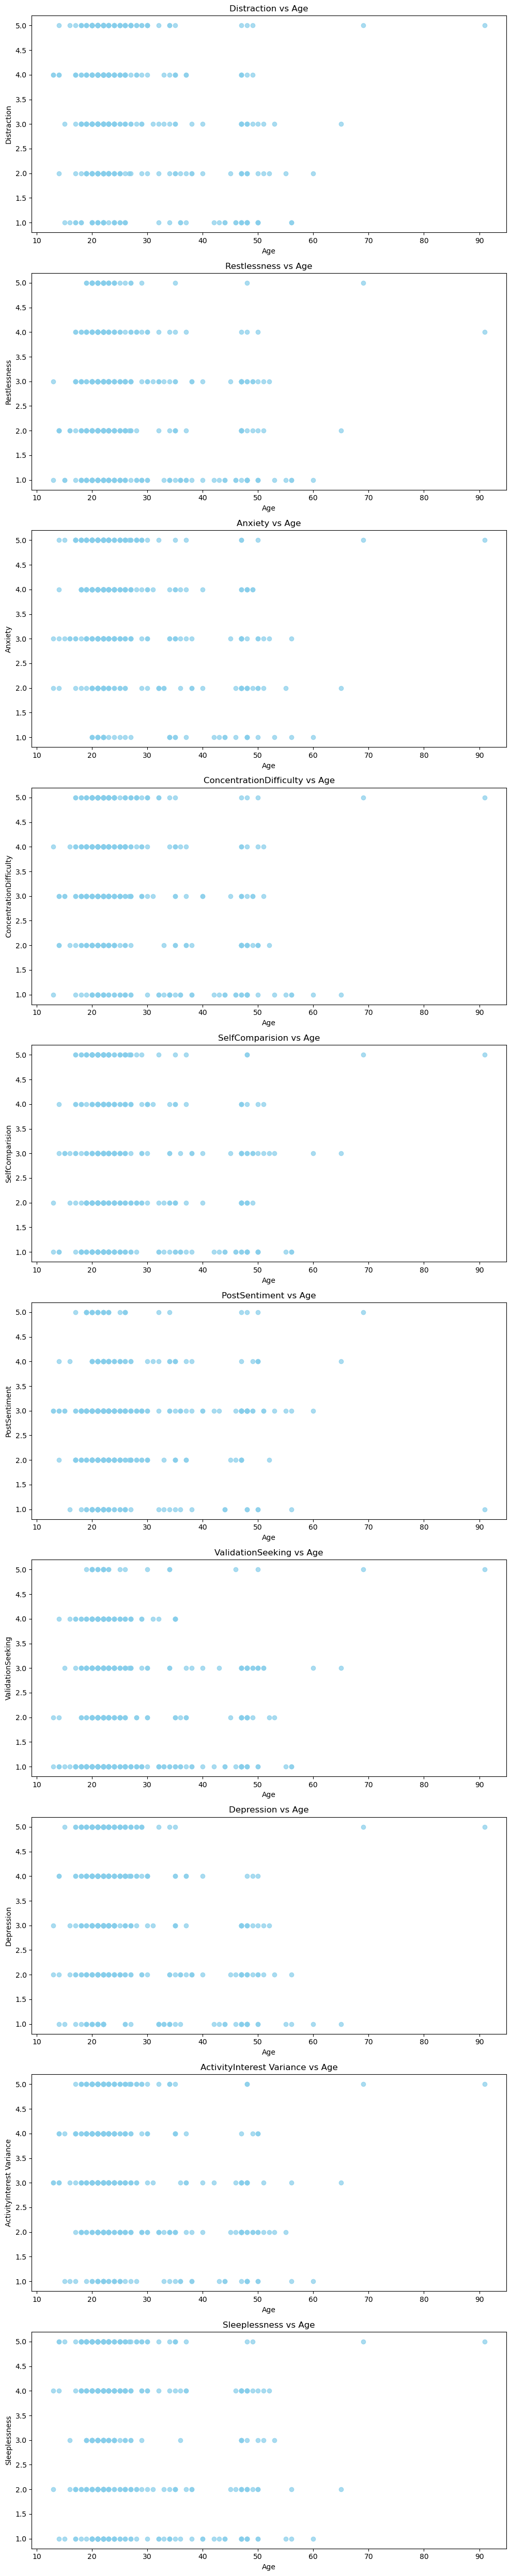

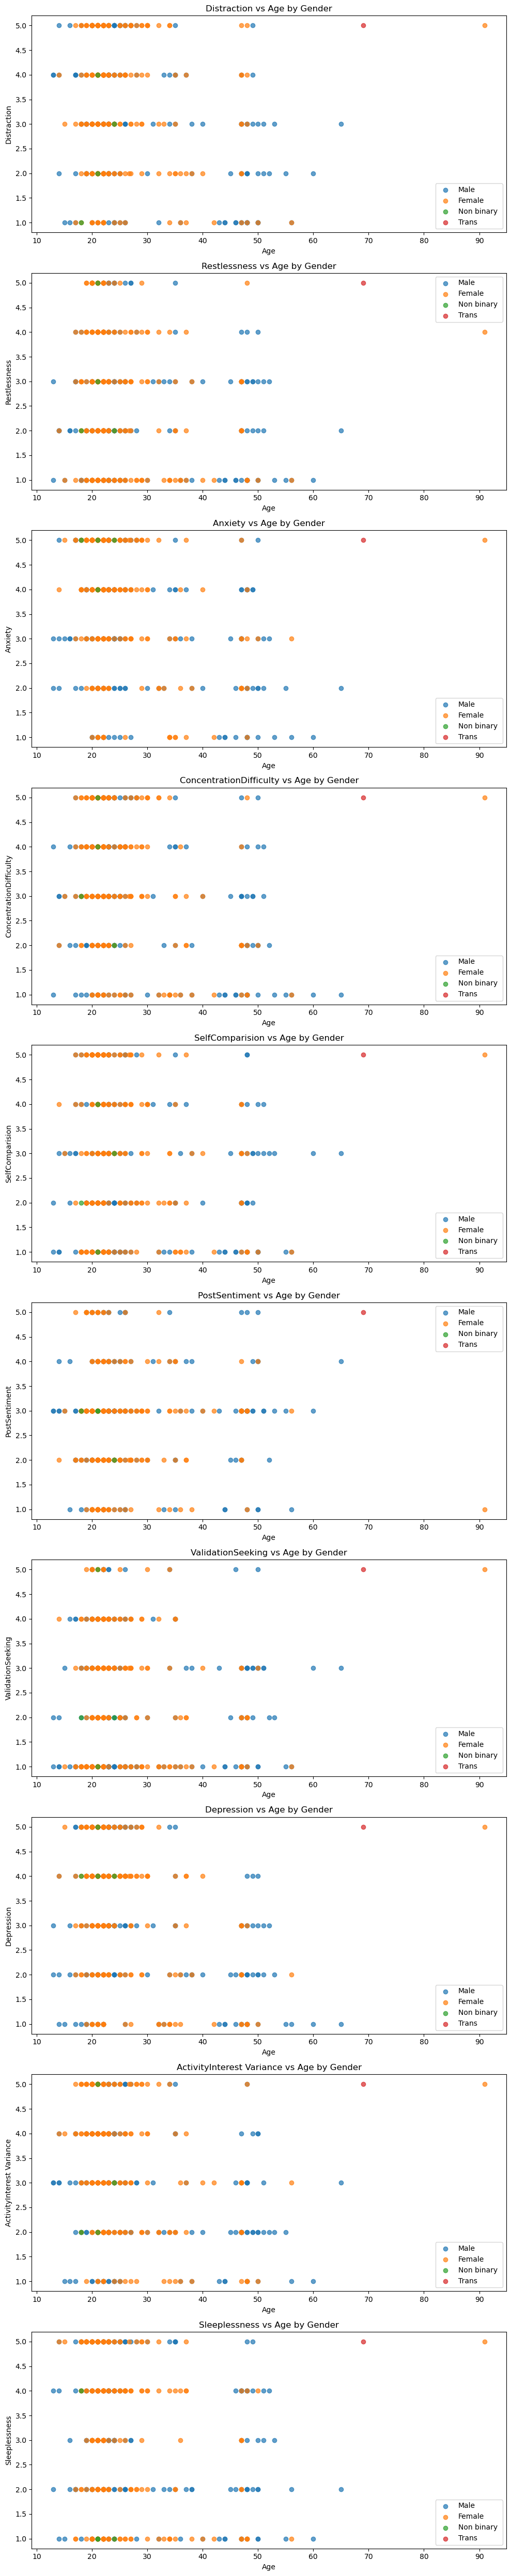

In [22]:
# Define the mental health columns
mental_health_columns = ['Distraction', 'Restlessness', 'Anxiety', 
                         'ConcentrationDifficulty', 'SelfComparision', 
                         'PostSentiment', 'ValidationSeeking', 'Depression', 
                         'ActivityInterest Variance', 'Sleeplessness']

# Create subplots for each mental health column for age
fig, axes = plt.subplots(len(mental_health_columns), 1, figsize=(10, 5 * len(mental_health_columns)))

# Plot each mental health column for age
for i, column in enumerate(mental_health_columns):
    ax = axes[i]
    ax.scatter(df['Age'], df[column], color='skyblue', alpha=0.7)
    ax.set_title(f'{column} vs Age')
    ax.set_xlabel('Age')
    ax.set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

# Create subplots for each mental health column for gender
fig, axes = plt.subplots(len(mental_health_columns), 1, figsize=(10, 5 * len(mental_health_columns)))

# Plot each mental health column for gender
for i, column in enumerate(mental_health_columns):
    ax = axes[i]
    for gender in df['Gender'].unique():
        ax.scatter(df[df['Gender'] == gender]['Age'], df[df['Gender'] == gender][column], label=gender, alpha=0.7)
    ax.set_title(f'{column} vs Age by Gender')
    ax.set_xlabel('Age')
    ax.set_ylabel(column)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# TWITTER ANALYSIS

In [21]:
# Filter the original DataFrame for rows where the 'Twitter' column is 1 (indicating Twitter usage)
twitter_users = df[df['Twitter'] == 1]

# Select only the mental health-related columns along with 'Age' and 'Gender' and 'Frequency'
mental_health_columns_twitter = ['Age', 'Gender', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness']

# Create a new DataFrame containing only the Twitter users and the selected columns
twitter_mental_health = twitter_users[mental_health_columns_twitter]

# Display the new DataFrame
twitter_mental_health.head()

,Age,Gender,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
0,21.0,Male,5,3,2,2,5,2,3,2,5,4,5
1,21.0,Female,4,3,2,5,4,5,1,1,5,4,5
5,22.0,Female,3,4,2,4,3,4,4,3,3,2,4
12,22.0,Female,4,4,2,4,2,4,2,1,3,1,5
13,21.0,Female,1,3,2,4,4,2,3,2,3,3,3
